In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<div style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output. Or better yet, avoid overly long output altogether.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>

In [3]:
# RUN THIS CELL
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import time

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [5 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [20 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)


- [**PART 2 [50 pts]: Analysis of Simulated ASEC Data**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 4:   Investigating trends [30 pts]](#part4questions)
  - [Question 5:  Calculate the Gini coefficient [10 pts]](#part5questions)
  - [Question 6:  Critiquing the simulated data [10 pts]](#part6questions)


## About this homework

This assignment is the first in which we'll go through the process of loading a dataset, splitting it into train and test sets, performing some preprocessing, and finally fitting some models and evaluating our results.

We have two different datasets:
- [**PART 1**](#part1) car data from [cardekho.com](https://www.cardekho.com/)
- [**PART 2**](#part2) *simulated* income data created from the [Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html)

Part 1 explores two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

Part 2 is focused EDA and visualization.

<a id="part1"></a>
    
# PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [5 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Identify all variables in the dataset. For each variable, state whether you consider it to be quantitative or categorical and briefly justify your choices. 

Answer: Year, MRP, and Kms_Driven are quantitative decision variables, while Current_Selling_Price, the variable we aim to predict, is the quantitative response variable.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

In [5]:
# Load the CSV file into a DataFrame
file_path = './data/car_dekho_full.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


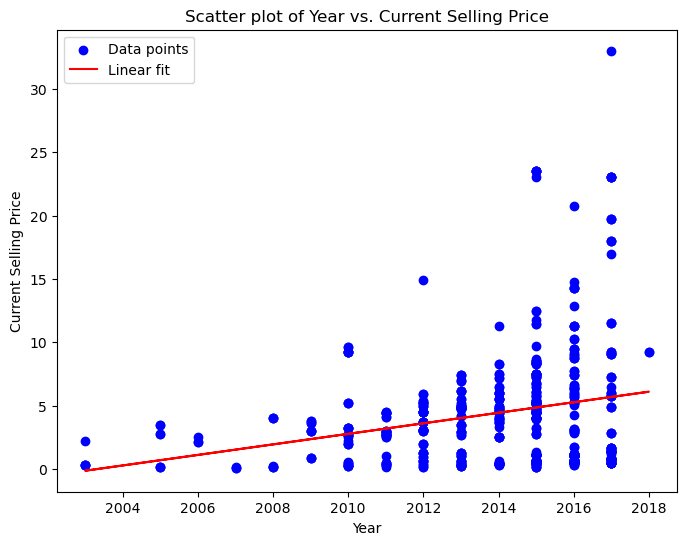

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Current_Selling_Price   R-squared:                       0.063
Model:                               OLS   Adj. R-squared:                  0.061
Method:                    Least Squares   F-statistic:                     40.02
Date:                   Sat, 28 Sep 2024   Prob (F-statistic):           4.92e-10
Time:                           20:28:38   Log-Likelihood:                -1739.2
No. Observations:                    601   AIC:                             3482.
Df Residuals:                        599   BIC:                             3491.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -832.4817    132.290     -6.293      0.000   -1092.290    -572.673
Year           0.4156      0.066      6.326      0.000       0.287       0.545
==============================================================================
Omnibus:                      283.353   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1570.078
Skew:                           2.070   Prob(JB):                         0.00
Kurtosis:                       9.749   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Scatter plot of "Year" (x) and "Current_Selling_Price" (y)
x = df['Year']
y = df['Current_Selling_Price']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Year')
plt.ylabel('Current Selling Price')
plt.title('Scatter plot of Year vs. Current Selling Price')

# Linear regression model
x_with_constant = sm.add_constant(x)  # Add a constant term for the intercept
model = sm.OLS(y, x_with_constant)
results = model.fit()

# Plot the linear regression line
plt.plot(x, results.predict(x_with_constant), color='red', label='Linear fit')
plt.legend()
plt.show()

# Show the statistics of the linear regression model
results.summary()

Answer: By using Year as the x-variable for a linear fit of the selling price, the R-squared value is 0.063

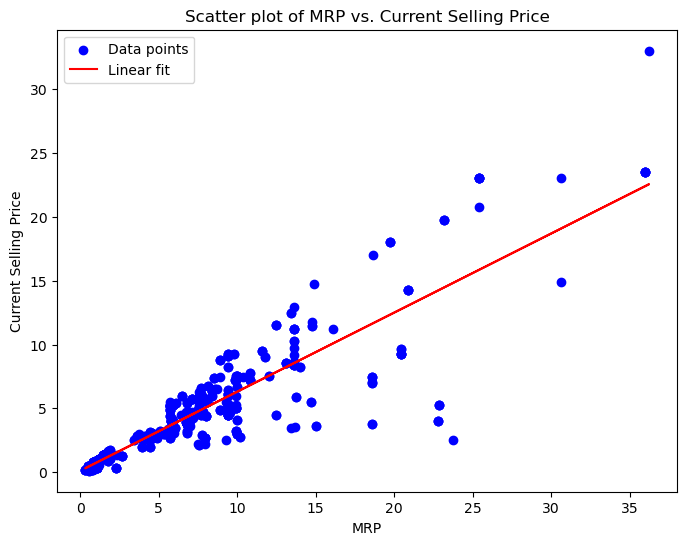

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Current_Selling_Price   R-squared:                       0.788
Model:                               OLS   Adj. R-squared:                  0.788
Method:                    Least Squares   F-statistic:                     2230.
Date:                   Sat, 28 Sep 2024   Prob (F-statistic):          4.52e-204
Time:                           20:28:38   Log-Likelihood:                -1292.2
No. Observations:                    601   AIC:                             2588.
Df Residuals:                        599   BIC:                             2597.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1145      0.124      0.922      0.357      -0.129       0.358
MRP            0.6190      0.013     47.219      0.000       0.593       0.645
==============================================================================
Omnibus:                      171.040   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1902.537
Skew:                          -0.919   Prob(JB):                         0.00
Kurtosis:                      11.521   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Scatter plot of "MRP" (x) and "Current_Selling_Price" (y)
x = df['MRP']
y = df['Current_Selling_Price']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('MRP')
plt.ylabel('Current Selling Price')
plt.title('Scatter plot of MRP vs. Current Selling Price')

# Linear regression model
x_with_constant = sm.add_constant(x)  # Add a constant term for the intercept
model = sm.OLS(y, x_with_constant)
results = model.fit()

# Plot the linear regression line
plt.plot(x, results.predict(x_with_constant), color='red', label='Linear fit')
plt.legend()
plt.show()

# Show the statistics of the linear regression model
results.summary()

Answer: By using MRP as the x-variable for a linear fit of the selling price, the R-squared value is 0.788

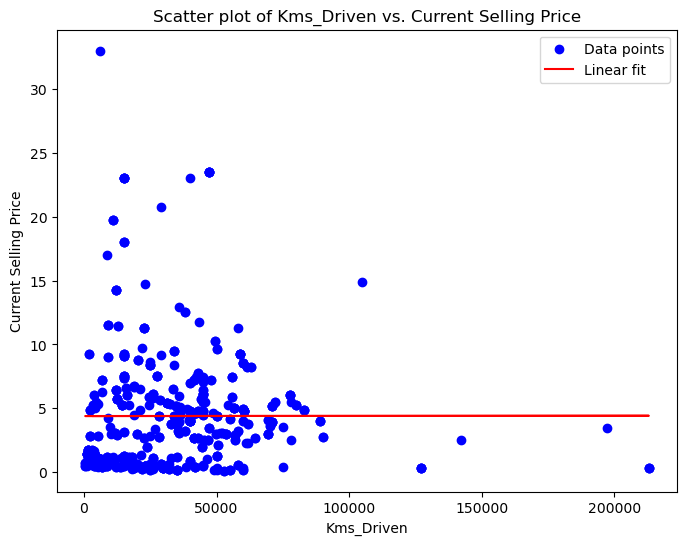

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Current_Selling_Price   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                 0.0002309
Date:                   Sat, 28 Sep 2024   Prob (F-statistic):              0.988
Time:                           20:28:38   Log-Likelihood:                -1758.7
No. Observations:                    601   AIC:                             3521.
Df Residuals:                        599   BIC:                             3530.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3896      0.296     14.815      0.000       3.808       4.971
Kms_Driven  1.045e-07   6.88e-06      0.015      0.988   -1.34e-05    1.36e-05
==============================================================================
Omnibus:                      312.976   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1893.161
Skew:                           2.305   Prob(JB):                         0.00
Kurtosis:                      10.373   Cond. No.                     6.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Scatter plot of "Kms_Driven" (x) and "Current_Selling_Price" (y)
x = df['Kms_Driven']
y = df['Current_Selling_Price']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Kms_Driven')
plt.ylabel('Current Selling Price')
plt.title('Scatter plot of Kms_Driven vs. Current Selling Price')

# Linear regression model
x_with_constant = sm.add_constant(x)  # Add a constant term for the intercept
model = sm.OLS(y, x_with_constant)
results = model.fit()

# Plot the linear regression line
plt.plot(x, results.predict(x_with_constant), color='red', label='Linear fit')
plt.legend()
plt.show()

# Show the statistics of the linear regression model
results.summary()

Answer: By using Kms_Driven as the x-variable for a linear fit of the selling price, the R-squared value is 0

Summary: If selecting only one factor as the decision variable for forecasting the selling price, MRP proves to be the most effective predictor.

<!-- END QUESTION -->

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [20 pts]</b></div>

[Return to contents](#contents)

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

<div class='exercise'><b>Q2.1</b></div>

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [9]:
# X is the 'MRP' column, y is the 'Current_Selling_Price' column
X = df[['MRP']]
y = df['Current_Selling_Price']

# Split the data into train and test sets with 75% training data, random_state=109
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

In [10]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2</b></div>

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.1</b></div>

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

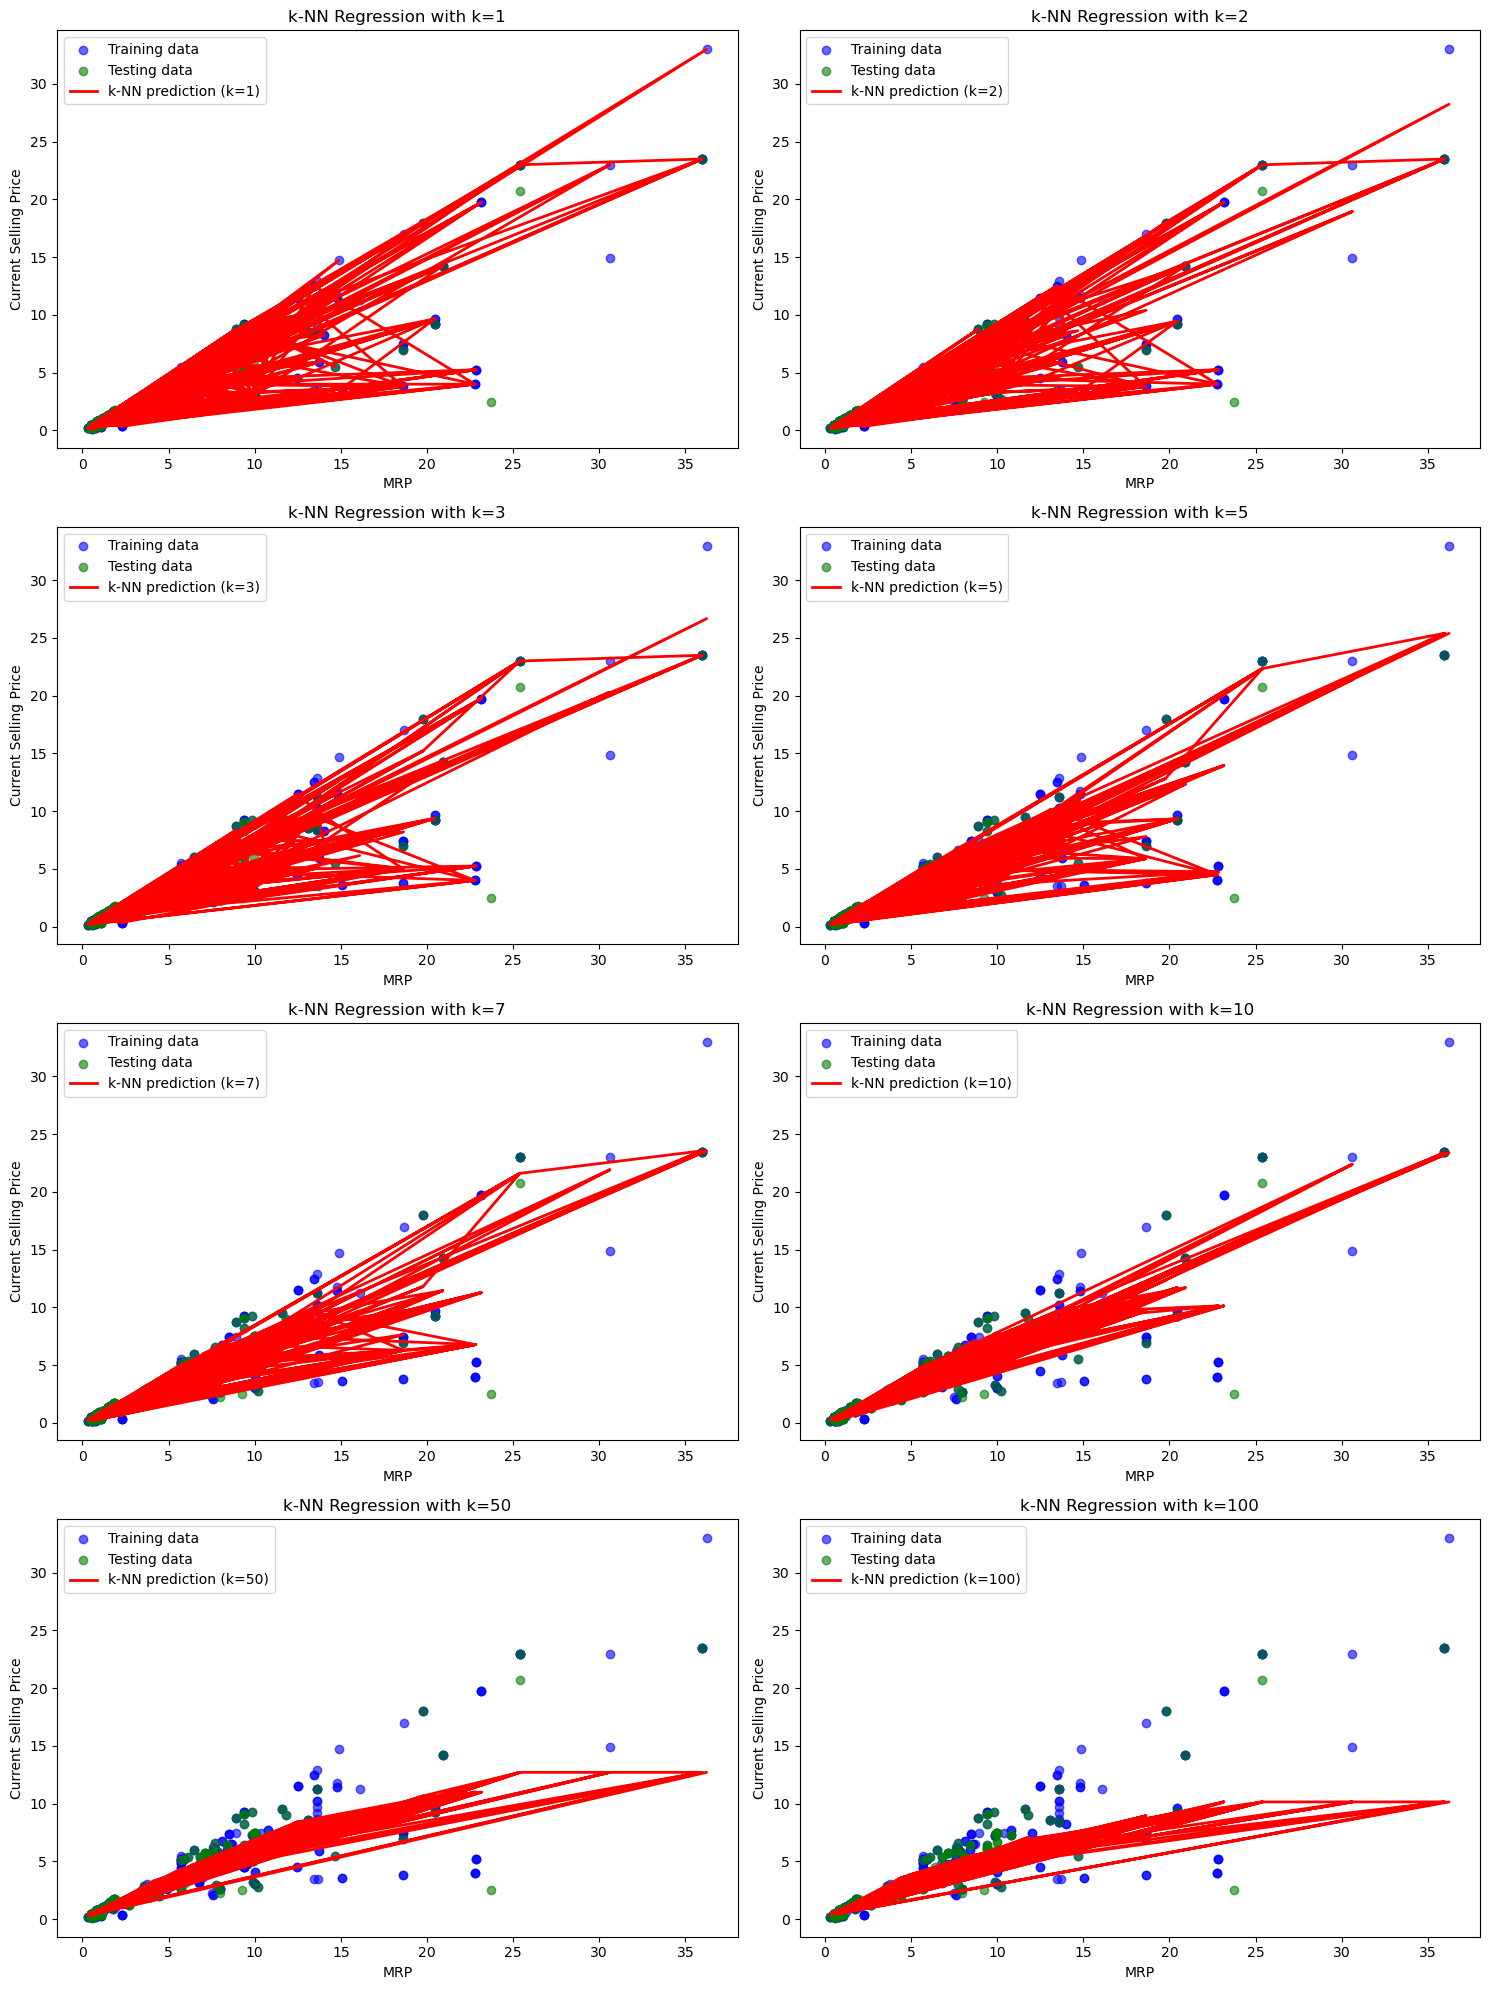

In [11]:
# List of k values
k_values = [1, 2, 3, 5, 7, 10, 50, 100]

# Create subplots in a 4x2 grid
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()  

# Plot each k-NN model
for idx, k in enumerate(k_values):
    # Create and fit the k-NN regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on both training and test sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Plot the results
    ax = axes[idx]
    ax.scatter(X_train, y_train, color='blue', label='Training data', alpha=0.6)
    ax.scatter(X_test, y_test, color='green', label='Testing data', alpha=0.6)
    ax.plot(X_train, y_train_pred, color='red', label=f'k-NN prediction (k={k})', linewidth=2)
    
    # plot title, labels, and legend
    ax.set_title(f'k-NN Regression with k={k}')
    ax.set_xlabel('MRP')
    ax.set_ylabel('Current Selling Price')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.2</b></div>

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).

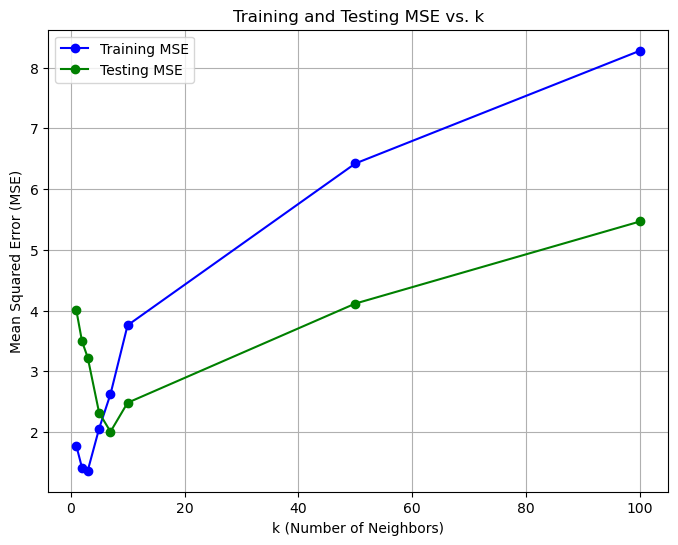

In [12]:
# Store MSE values for each k
train_mse = []
test_mse = []

# Loop through each k and calculate MSE for both training and testing sets
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate MSE for training and testing data
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot MSE values for both training and testing sets
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_mse, label='Training MSE', marker='o', color='blue')
plt.plot(k_values, test_mse, label='Testing MSE', marker='o', color='green')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing MSE vs. k')
plt.legend()
plt.grid(True)
plt.show()

<!-- END QUESTION -->

<div class='exercise'><b>Q2.2.3</b></div>

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.

In [13]:
best_k = k_values[np.argmin(test_mse)]
best_mse = min(test_mse)

In [14]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 2.005.


In [15]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

<div class='exercise'><b>Q2.2.4</b></div>

Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.

In [16]:
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_test_pred_best = best_knn.predict(X_test)

best_r2 = r2_score(y_test, y_test_pred_best)

In [17]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=7 is 0.8755.


In [18]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

<div class='exercise'><b>Q3.1</b></div>

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

<div class='exercise'><b>Q3.1.1</b></div>

Fit a linear regression model. Name your model `linreg`.

In [19]:
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [20]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

<div class='exercise'><b>Q3.1.2</b></div>

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

In [21]:
# your code here
slope = linreg.coef_[0]
intercept = linreg.intercept_

In [22]:
print(
    f"Intercept of the fitted linear model\t\t{intercept:.4f}\n"
    f"Slope of the fitted linear model\t{slope:.4f}"
)

Intercept of the fitted linear model		0.1124
Slope of the fitted linear model	0.6157


In [23]:
grader.check("q3.1.2")

q3.1.2 results: All test cases passed!

<div class='exercise'><b>Q3.1.3</b></div>

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

In [24]:
#Compute the MSE of the model
lin_train_mse = mean_squared_error(y_train, linreg.predict(X_train))
lin_test_mse = mean_squared_error(y_test, linreg.predict(X_test))
#Compute the R-squared of the model
lin_test_r2 = r2_score(y_test, linreg.predict(X_test))

In [25]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


In [26]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1.4</b></div>

Create the following 3 plots:
- Plot the **regression line** along with the **training data**.
- Plot the **residuals** of the model on the **training** set as a function of the **predictor** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a the **distribution** of the **residuals** on the **training** set.

As always, your plots should be well-labeled.

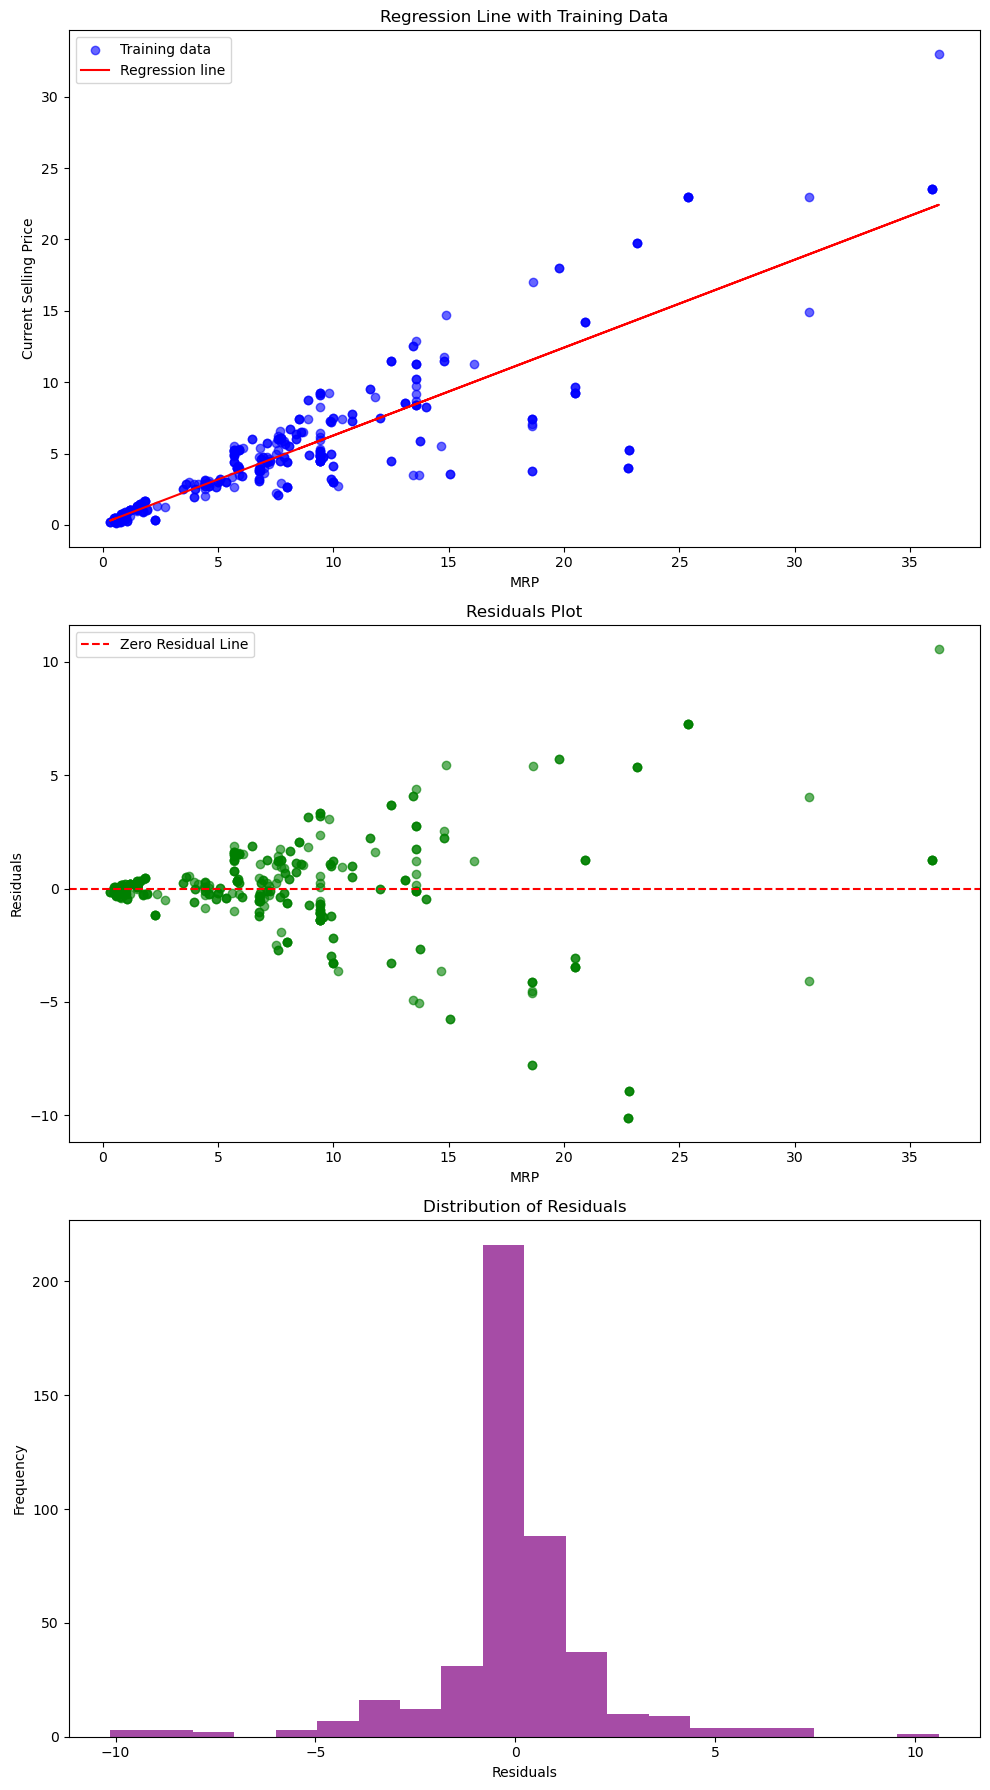

In [27]:
# calculate the residuals for the training data
y_train_pred = linreg.predict(X_train)
train_residuals = y_train - y_train_pred

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot A: Regression line with training data
axes[0].scatter(X_train, y_train, color='blue', label='Training data', alpha=0.6)
axes[0].plot(X_train, y_train_pred, color='red', label='Regression line')
axes[0].set_xlabel('MRP')
axes[0].set_ylabel('Current Selling Price')
axes[0].set_title('Regression Line with Training Data')
axes[0].legend()

# Plot B: Residuals plot
axes[1].scatter(X_train, train_residuals, color='green', alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
axes[1].set_xlabel('MRP')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')
axes[1].legend()

# Plot C: Distribution of residuals
axes[2].hist(train_residuals, bins=20, color='purple', alpha=0.7)
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Residuals')

# Show all plots
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<div class='exercise'><b>Q3.2</b></div>
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.1</b></div>

A linear regression model makes four important assumptions. For each assumption, describe how one or more of the plots in the previous question may provide evidence that (1) the assumption holds, (2) that the assumption is violated, or (3) that none of the plots have any bearing on the assumption. 

**Note:** Don't over-think this question! You are just being asked to use the plots above to check the four assumptions and to explain your reasoning.

Answer: Linearity and homoscedasticity assumptions seem to hold based on plot 1 and 2. Normality of residuals looks reasonable, even though it is a little bit right skewed on plot 3.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.2</b></div>

Based on what you have seen in the preceding questions, which model would you select as the best and why? Might you have any reason to doubt your choice? Why or why not?

**Hint:** There were more than just 2 candidate models.

Answer: According to the k-NN model with k=7, the test MSE is 2.005 and the R-squared value is 0.8755. In comparison, the linear regression model has a test MSE of 3.136 and an R-squared value of 0.8053. Therefore, relatively speaking, the k-NN model with k=7 appears to be the better model.

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [50 pts]: Analysis of 2024 US Annual Social and Economic (ASEC) Supplement

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2024 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4: Investigating trends [30 pts]</b></div>

[Return to contents](#contents)

Below we'll answer questions about potential trends in the data with the help of plots and/or simple statistics. Your goal should be to communicate your findings clearly. So be sure to provide an interpretation with your visualizations or other output.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

In [28]:
# Load the dataset
file_path = './data/census_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,Unnamed: 0,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
0,0,85,0,0,-1,0,1,0,0,0,0,0,0,0,2,9028.04
1,1,85,0,0,-1,0,1,0,1,1,0,0,0,0,2,23728.07
2,3,53,0,0,-1,0,1,0,0,0,0,0,0,0,2,11747.51
3,4,52,52,42,-1,0,1,0,1,0,0,5,5,0,2,40486.23
4,5,68,0,0,-1,0,0,1,1,0,0,0,0,0,2,9436.61


/tmp/ipykernel_35437/3571531044.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['sex'] == 0]['income'], df[df['sex'] == 1]['income']], labels=['Female', 'Male'])


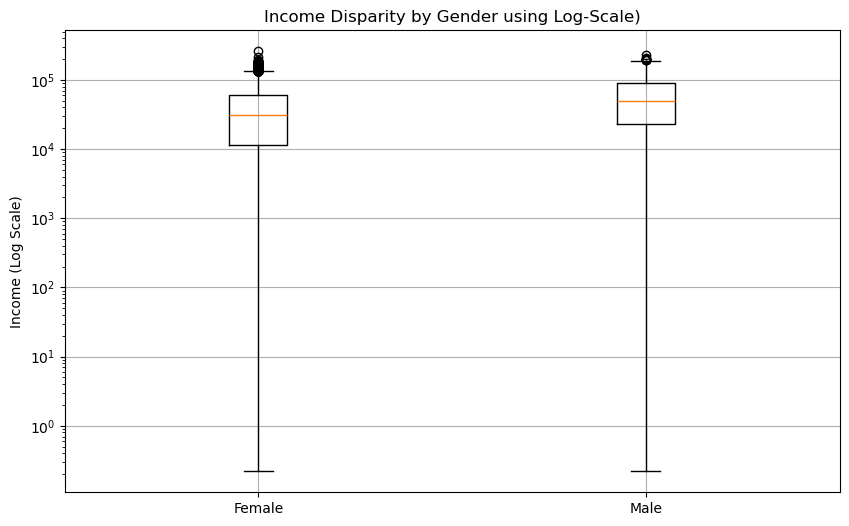

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,56885.0,40013.689,35314.175,0.22,11458.630,30831.060,60501.150,259463.145
1,52482.0,55504.265,38862.811,0.22,22945.198,50142.095,89816.805,226731.260


In [29]:
# To check disparity in income by gender, group the data by gender and calculate statistics
gender_income_stats = df.groupby('sex')['income'].describe()

# Log scale is used in plotting
plt.figure(figsize=(10, 6))

# Boxplot to visualize income disparity by gender
plt.boxplot([df[df['sex'] == 0]['income'], df[df['sex'] == 1]['income']], labels=['Female', 'Male'])
plt.yscale('log')

plt.title('Income Disparity by Gender using Log-Scale)')
plt.ylabel('Income (Log Scale)')
plt.grid(True)

plt.show()

# statistical summary for the two groups
gender_income_stats

Answer: On average, females have an income of 40,013 usd, while males earn 55,504 usd. The median income for females is 30,831 usd, compared to 50,142 usd for males. These findings suggest a significant income disparity in favor of males

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining the numerical ordering in the dataset might be preferable to education level as a categorical variable lacking order. 

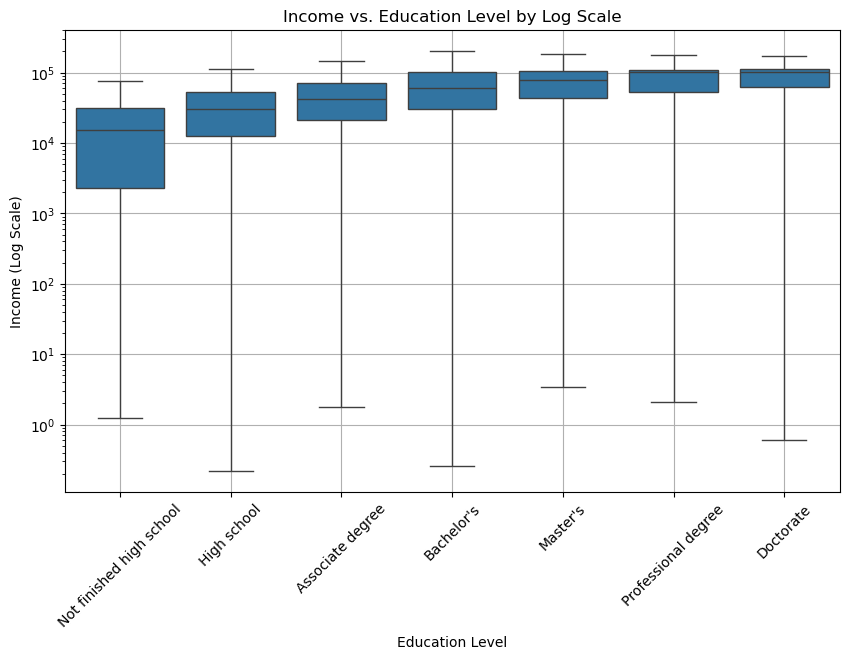

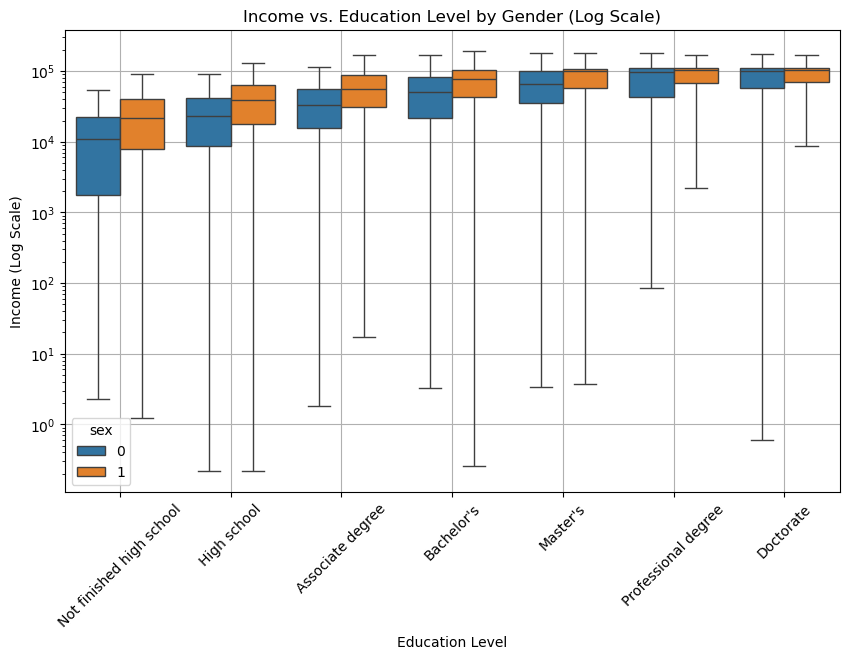

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
0,10860.0,21823.898,23334.722,1.25,2266.332,15390.975,31378.285,175759.141
1,48768.0,36698.615,31187.503,0.22,12380.835,30244.665,52195.317,259463.145
2,11434.0,48289.815,34534.321,1.80,21216.752,42267.045,70918.200,198112.096
3,23755.0,63011.975,39440.205,0.26,30132.615,61152.230,101143.196,209193.288
4,10876.0,73619.192,38753.820,3.39,42904.645,78207.960,105333.777,226731.260
5,1427.0,83298.859,38642.610,2.12,52296.295,101600.461,110080.670,179685.160
6,2247.0,86285.258,37497.628,0.60,63229.255,101352.127,110489.126,202993.787


In [30]:
# compute the overall relationship between education level and income
education_income_stats = df.groupby('education')['income'].describe()

# plot a scatter plot with education levels and income
plt.figure(figsize=(10, 6))

# Scatterplot with education levels on x-axis and income on y-axis, using log scale for income
sns.boxplot(x='education', y='income', data=df, showfliers=False)
plt.yscale('log')

plt.title('Income vs. Education Level by Log Scale')
plt.xlabel('Education Level')
plt.ylabel('Income (Log Scale)')
plt.grid(True)
plt.xticks(ticks=np.arange(7), labels=[
    'Not finished high school', 'High school', 'Associate degree', 
    'Bachelor\'s', 'Master\'s', 'Professional degree', 'Doctorate'], rotation=45)

plt.show()

# examine the trend by gender
plt.figure(figsize=(10, 6))

# Boxplot showing income vs. education level by gender
sns.boxplot(x='education', y='income', hue='sex', data=df, showfliers=False)
plt.yscale('log')

plt.title('Income vs. Education Level by Gender (Log Scale)')
plt.xlabel('Education Level')
plt.ylabel('Income (Log Scale)')
plt.grid(True)
plt.xticks(ticks=np.arange(7), labels=[
    'Not finished high school', 'High school', 'Associate degree', 
    'Bachelor\'s', 'Master\'s', 'Professional degree', 'Doctorate'], rotation=45)

plt.show()

# Display summary statistics for education-income relationship
education_income_stats

Answer: 

1. The average income increases from 21,823 usd for those without a degree to 86,285 usd for those with a doctorate. Higher degrees are consistently associated with higher income. Similarly, the 25th, 50th, and 75th percentiles also show a rising trend as education levels increase.

2. Both males and females exhibit a similar upward trend in income as education levels rise. However, males tend to earn more than females at each educational level.

3. Treating education as an ordinal variable is important. The analysis indicates that both females and males see higher incomes with more advanced degrees.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Is there a clear trend between age and income?

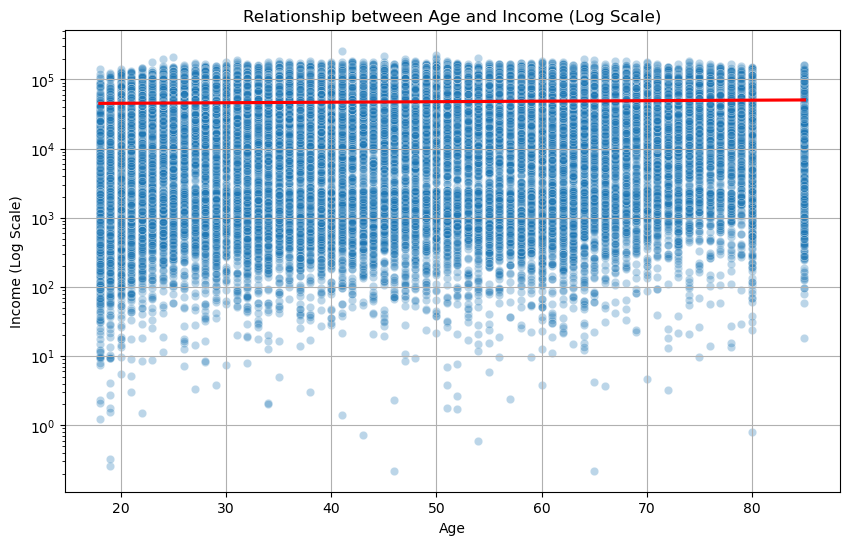

In [31]:
# first visualize it using a scatter plot btw. age and income, then fit a regression line to identify the trend.

plt.figure(figsize=(10, 6))

# Scatter plot for age vs. income
sns.scatterplot(x='age', y='income', data=df, alpha=0.3)
plt.yscale('log')

# Adding a regression line
sns.regplot(x='age', y='income', data=df, scatter=False, color='red', logx=False)

plt.title('Relationship between Age and Income (Log Scale)')
plt.xlabel('Age')
plt.ylabel('Income (Log Scale)')
plt.grid(True)

plt.show()

Answer: It is interesting to note that there is no clear regression trend between age and income. While income tends to increase in early adulthood, it eventually levels off across the entire age range. The regression line shows a slight rise during youth, but flattens out over time.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

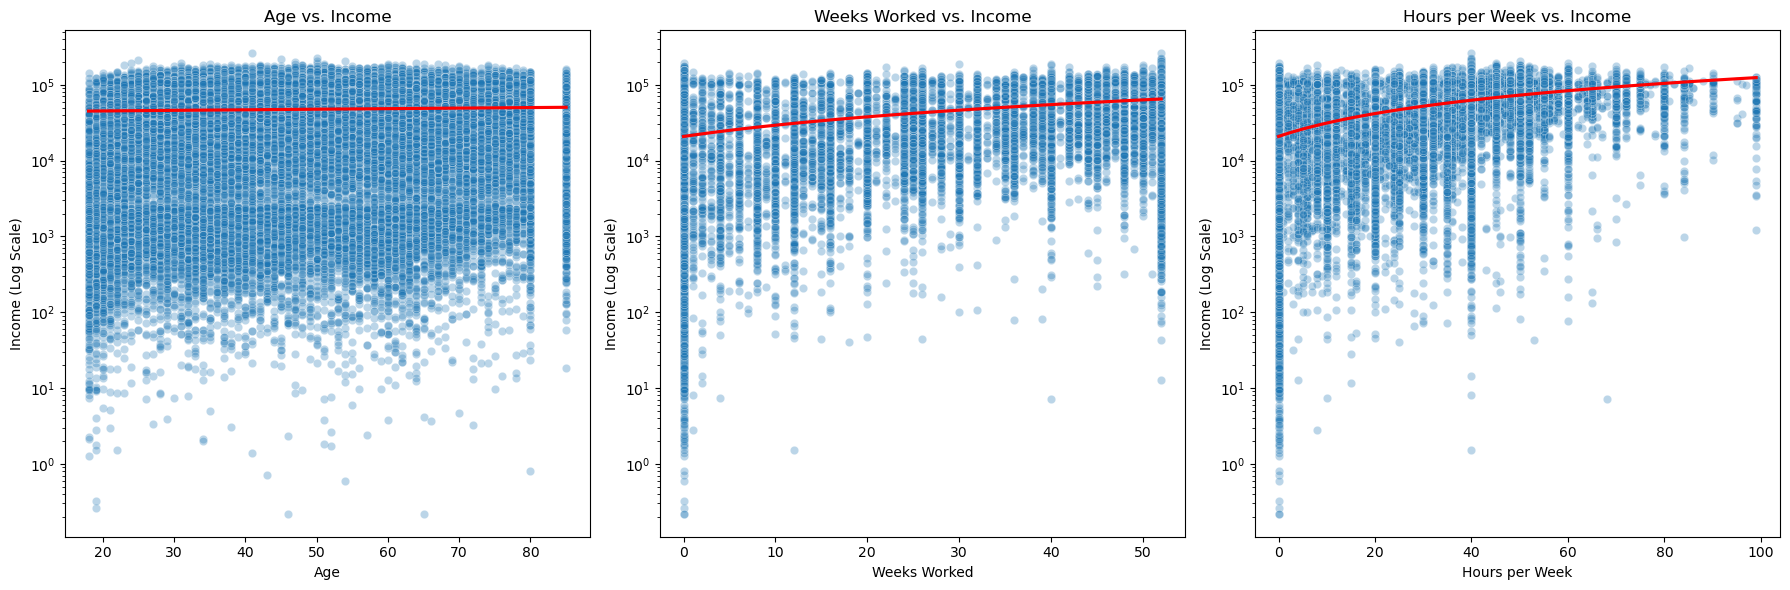

In [32]:
# look at relationship between income and the three quantitative attributes: age, weeks_worked, and hours_per_week, which are quantitative here.
# create scatter plots for each, with regression lines to observe the trends.

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for age vs. income
sns.scatterplot(x='age', y='income', data=df, alpha=0.3, ax=axes[0])
sns.regplot(x='age', y='income', data=df, scatter=False, color='red', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Age vs. Income')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Income (Log Scale)')

# Scatter plot for weeks_worked vs. income
sns.scatterplot(x='weeks_worked', y='income', data=df, alpha=0.3, ax=axes[1])
sns.regplot(x='weeks_worked', y='income', data=df, scatter=False, color='red', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Weeks Worked vs. Income')
axes[1].set_xlabel('Weeks Worked')
axes[1].set_ylabel('Income (Log Scale)')

# Scatter plot for hours_per_week vs. income
sns.scatterplot(x='hours_per_week', y='income', data=df, alpha=0.3, ax=axes[2])
sns.regplot(x='hours_per_week', y='income', data=df, scatter=False, color='red', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Hours per Week vs. Income')
axes[2].set_xlabel('Hours per Week')
axes[2].set_ylabel('Income (Log Scale)')

plt.tight_layout()
plt.show()

Answer: there are three quantitative variables that we can analyze individually in relation to income: age, weeks worked per year, and hours worked per week.

1. Per Age vs. Income: As discussed in the previous section, there is no clear relationship between age and income.

2. Per Weeks Worked vs. Income: A strong positive relationship is evident between weeks worked and income. This relationship appears to be linear, although there is some variability.

3. Per Hours Worked per Week vs. Income: The relationship between hours worked per week and income is also positive, but it exhibits more variability. The regression trend suggests a log-normal pattern, though it is likely nonlinear.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.5</b></div>

What is the average effect of the `military_service` variable on income?

In [33]:
# calculate the average income for people who have served and those who haven't served in the military.
military_service_income_stats = df.groupby('military_service')['income'].describe()

# Displaying the result
military_service_income_stats

,count,mean,std,min,25%,50%,75%,max
military_service,,,,,,,,
0,102276.0,46658.375,37743.83,0.22,15303.862,37692.305,72163.66,259463.145
1,7091.0,58824.093,37688.27,8.54,27101.975,52470.160,92860.22,226731.260


Answer: The statistics show that individuals with military service experience tend to earn more than those without such experience. This income difference is evident across various percentiles, including the mean, 25th percentile, median, and 75th percentile, indicating that military service is associated with higher income.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.6</b></div>

Propose a question of your own that you would like to explore in the data. Create a visualization to help you answer this question and provide an interpretation of your findings.

My question: Do females with military service earn more than males with military service? Provide a visualization and derive insights from the analysis.

/tmp/ipykernel_35437/4159121257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='income', data=df, palette="Set2", showfliers=False)


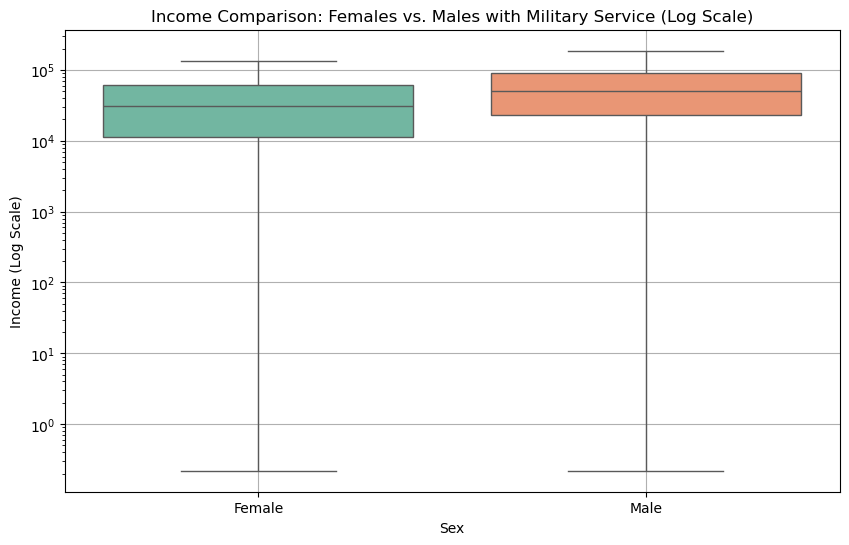

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,56885.0,40013.689,35314.175,0.22,11458.630,30831.060,60501.150,259463.145
1,52482.0,55504.265,38862.811,0.22,22945.198,50142.095,89816.805,226731.260


In [34]:
# run the boxplot creation code
plt.figure(figsize=(10, 6))

# Boxplot for income by gender for individuals with military service
sns.boxplot(x='sex', y='income', data=df, palette="Set2", showfliers=False)

plt.yscale('log')
plt.title('Income Comparison: Females vs. Males with Military Service (Log Scale)')
plt.xlabel('Sex')
plt.ylabel('Income (Log Scale)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.grid(True)
plt.show()

# Calculating statistics for females and males with military service
military_gender_income_stats = df.groupby('sex')['income'].describe()

# Displaying the statistics
military_gender_income_stats

Answer: From the plot and statistics above, we can see that males with military service experience earn more than females across the mean, 25th percentile, median, and 75th percentile. The boxplot also shows that males with military service have a higher upper bound in earnings compared to females with military service.

<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient [10 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

<div class='exercise'><b>Q5.1</b></div>

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

In [35]:
# Extract income data
income_data = df['income'].values

# Sort income in ascending order
income_sorted = np.sort(income_data)

# Get the number of observations
n = len(income_sorted)

# Calculate the sum of income values
income_sum = np.sum(income_sorted)

# Calculate the Gini coefficient using the formula
gini_numerator = sum((2 * i - n - 1) * x for i, x in enumerate(income_sorted, start=1))
gini_coef = gini_numerator / (n * income_sum)

In [36]:
# Print resulting Gini coefficient
print(f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.448


In [37]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

Answer: My calculated Gini coefficient is 0.448, which is higher than the World Bank's reported value of 0.415. This difference may be influenced by several factors: the self-reported nature of the data, which can affect the accuracy of the Gini calculation, as well as the pre-processing steps. Additionally, the simulation may have an impact, as the data could be portioned and not represent the entire population. Therefore, while my calculated Gini coefficient is close to the World Bank's figure, factors such as self-reporting, data pre-processing, and simulation or sampling methods likely affect the result.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Critiquing the simulated data [10 pts]</b></div>

[Return to contents](#contents)

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

> **Note**: The rubric below is provided for transparency. Please ensure your responses are genuine and thoughtful, rather than simply attempting to "fit" the rubric.
---
<details>
<summary><b>Click to view the Q6 Critique Rubric</b></summary>
    
### Q6 Critique Rubric:

**Total Points: 10**

#### 1. Relevance of Comments (4 points):
- **4 points**: The critique directly addresses specific sections or steps in the preprocessing notebook, demonstrating a thorough understanding of the content.
- **3 points**: The critique references multiple sections of the notebook with some specificity.
- **2 points**: The critique generally addresses the notebook but may lack specific references to steps or sections.
- **1 point**: The critique provides only a cursory overview without specific details.
- **0 points**: The critique does not address the preprocessing notebook.

#### 2. Depth of Analysis (4 points):
- **4 points**: The student provides deep insights, identifies potential pitfalls, or suggests meaningful improvements for multiple sections of the notebook.
- **3 points**: The student provides valuable feedback for one section or multiple but less detailed feedback for several sections.
- **2 points**: The analysis is somewhat detailed but may lack depth or actionable feedback.
- **1 point**: The feedback is generic or surface-level.
- **0 points**: No meaningful analysis provided.

#### 3. Clarity and Organization (2 points):
- **2 points**: The critique is well-organized, clear, and easy to follow.
- **1 point**: The critique is somewhat organized but may have unclear sections.
- **0 points**: The critique is disorganized or difficult to understand.

---

Remember to provide specific examples or suggestions whenever possible. General statements without backing evidence or examples will not be as valuable as those with clear references and reasoning.

</details>


Answer: 

1. I believe the "expanded relationship" should be included, as relationships such as being a husband, wife, parent, or child can significantly impact a person's motivation to earn income and should not be overlooked. Additionally, full-time and part-time students should be separated, as their differing study workloads can affect their available time to earn money, thus influencing their income. Health conditions, both physical and mental, should also be considered as factors affecting individual income.

2. I disagree with the suggestion to list all unique category numbers, such as "proof of exhaustion," as this increases the degrees of freedom, leading to greater complexity and higher computational resource usage. Including every unique category number is unnecessary for classification.

3. Yes, I agree. The original dataset uses a step of 2,500, starting from 0 to 100,000 USD. A better approach could be to classify income into broader categories, such as using 5,000 or 10,000 as thresholds for low-income brackets. Additionally, more categories should be added for those earning above 100,000 USD, as inflation leads to more people entering higher income ranges. This would provide a more accurate classification of income distribution.

<!-- END QUESTION -->

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

In [38]:
hours_spent_on_hw = 8

In [39]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [40]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 0.43 minutes for this notebook to run


🌈 **This concludes HW2. Thank you!**

[Return to contents](#contents)